In [55]:
import pandas as pd

dados = pd.read_csv("teste_indicium_precificacao.csv")

print(dados.head())
print(dados.info())

     id                                              nome  host_id  \
0  2595                             Skylit Midtown Castle     2845   
1  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
2  3831                   Cozy Entire Floor of Brownstone     4869   
3  5022  Entire Apt: Spacious Studio/Loft by central park     7192   
4  5099         Large Cozy 1 BR Apartment In Midtown East     7322   

     host_name bairro_group        bairro  latitude  longitude  \
0     Jennifer    Manhattan       Midtown  40.75362  -73.98377   
1    Elisabeth    Manhattan        Harlem  40.80902  -73.94190   
2  LisaRoxanne     Brooklyn  Clinton Hill  40.68514  -73.95976   
3        Laura    Manhattan   East Harlem  40.79851  -73.94399   
4        Chris    Manhattan   Murray Hill  40.74767  -73.97500   

         room_type  price  minimo_noites  numero_de_reviews ultima_review  \
0  Entire home/apt    225              1                 45    2019-05-21   
1     Private room    150   

In [56]:

valores_ausentes = dados.isnull().sum()
print(valores_ausentes)

id                                   0
nome                                16
host_id                              0
host_name                           21
bairro_group                         0
bairro                               0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimo_noites                        0
numero_de_reviews                    0
ultima_review                    10052
reviews_por_mes                  10052
calculado_host_listings_count        0
disponibilidade_365                  0
dtype: int64


In [79]:
import pandas as pd
def limpeza_basica_dados():
     
    dados = pd.read_csv("teste_indicium_precificacao.csv")
    dados['host_name'] = dados['host_name'].fillna("Desconhecido")
    dados['nome'] = dados['nome'].fillna("Desconhecido") 
    dados = dados.assign(reviews_por_mes=dados['reviews_por_mes'].fillna(0))
    dados= dados.drop(columns=['ultima_review'])
    dados = dados[dados['price'] > 0]
    dados['minimo_noites'] = dados['minimo_noites'].fillna(1) 
    
    return dados
dados_limpos = limpeza_basica_dados()

print(dados_limpos.head())


     id                                              nome  host_id  \
0  2595                             Skylit Midtown Castle     2845   
1  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
2  3831                   Cozy Entire Floor of Brownstone     4869   
3  5022  Entire Apt: Spacious Studio/Loft by central park     7192   
4  5099         Large Cozy 1 BR Apartment In Midtown East     7322   

     host_name bairro_group        bairro  latitude  longitude  \
0     Jennifer    Manhattan       Midtown  40.75362  -73.98377   
1    Elisabeth    Manhattan        Harlem  40.80902  -73.94190   
2  LisaRoxanne     Brooklyn  Clinton Hill  40.68514  -73.95976   
3        Laura    Manhattan   East Harlem  40.79851  -73.94399   
4        Chris    Manhattan   Murray Hill  40.74767  -73.97500   

         room_type  price  minimo_noites  numero_de_reviews  reviews_por_mes  \
0  Entire home/apt    225              1                 45             0.38   
1     Private room    

In [80]:
valores_ausentes = dados_limpos.isnull().sum()
print(valores_ausentes)


id                               0
nome                             0
host_id                          0
host_name                        0
bairro_group                     0
bairro                           0
latitude                         0
longitude                        0
room_type                        0
price                            0
minimo_noites                    0
numero_de_reviews                0
reviews_por_mes                  0
calculado_host_listings_count    0
disponibilidade_365              0
dtype: int64


In [81]:
dados_zero = dados_limpos[dados_limpos['minimo_noites'] == 0]
print(dados_zero)

Empty DataFrame
Columns: [id, nome, host_id, host_name, bairro_group, bairro, latitude, longitude, room_type, price, minimo_noites, numero_de_reviews, reviews_por_mes, calculado_host_listings_count, disponibilidade_365]
Index: []


In [75]:
'''#print(dados_limpos.columns)
#noites_zero = (dados_limpos['minimo_noites'] == 0).sum()
#preco_zero = (dados_limpos['price'] == 0).sum()

#print(f"Número de valores com preço igual a 0: {preco_zero}")
#print(f"Número minimo de noites igual a 0: {noites_zero}")'''

'#print(dados_limpos.columns)\n#noites_zero = (dados_limpos[\'minimo_noites\'] == 0).sum()\n#preco_zero = (dados_limpos[\'price\'] == 0).sum()\n\n#print(f"Número de valores com preço igual a 0: {preco_zero}")\n#print(f"Número minimo de noites igual a 0: {noites_zero}")'

In [84]:
#identificando as outliers

q1_preco = dados_limpos['price'].quantile(0.25)
q3_preco = dados_limpos['price'].quantile(0.75)
iqr_preco = q3_preco - q1_preco

q1_noites = dados_limpos['minimo_noites'].quantile(0.25)
q3_noites = dados_limpos['minimo_noites'].quantile(0.75)
iqr_noites = q3_noites - q1_noites

limite_inferior_preco = max(0, q1_preco - 1.5 * iqr_preco)
limite_superior_preco = q3_preco + 1.5 * iqr_preco

limite_inferior_noites = max(0, q1_noites - 1.5 * iqr_noites)
limite_superior_noites = q3_noites + 1.5 * iqr_noites

print(f"Preço - Limite Inferior: {limite_inferior_preco}, Limite Superior: {limite_superior_preco}")
print(f"Noites Mínimas - Limite Inferior: {limite_inferior_noites}, Limite Superior: {limite_superior_noites}")

Preço - Limite Inferior: 0, Limite Superior: 334.0
Noites Mínimas - Limite Inferior: 0, Limite Superior: 11.0


In [64]:
registros_originais = 48895
registros_finais = dados_limpos.shape[0]
registros_removidos = registros_originais - registros_finais

print(f"Registros originais: {registros_originais}")
print(f"Registros finais: {registros_finais}")
print(f"Registros removidos: {registros_removidos}")



Registros originais: 48895
Registros finais: 48883
Registros removidos: 12


In [79]:
dados_limpos.to_csv('C:/Users/Guilherme/Indicium/Insights_indicium/dados_limpos.csv', index=False)

Registros originais: 48895
Registros finais: 48883
Registros removidos: 12


In [36]:
ausentes = dados_limpos.isnull().sum()
print(ausentes)

id                               0
nome                             0
host_id                          0
host_name                        0
bairro_group                     0
bairro                           0
latitude                         0
longitude                        0
room_type                        0
price                            0
minimo_noites                    0
numero_de_reviews                0
reviews_por_mes                  0
calculado_host_listings_count    0
disponibilidade_365              0
dtype: int64


In [65]:
estatisticas = dados_limpos[['price', 'minimo_noites', 'disponibilidade_365', 'numero_de_reviews']].describe()
minimos = estatisticas.loc['min']
medias = dados_limpos[['price', 'minimo_noites', 'disponibilidade_365', 'numero_de_reviews']].mean()
medianas = dados_limpos[['price', 'minimo_noites', 'disponibilidade_365', 'numero_de_reviews']].median()
maximos = estatisticas.loc['max']

In [66]:
resumo_estatisticas = pd.DataFrame({
    'Mínimo': minimos,
    'Média': medias,
    'Mediana': medianas,
    'Máximo': maximos
}).transpose()

print(resumo_estatisticas)

               price  minimo_noites  disponibilidade_365  numero_de_reviews
Mínimo      10.00000        1.00000             0.000000           0.000000
Média      152.75513        7.03001           112.774339          23.272283
Mediana    106.00000        3.00000            45.000000           5.000000
Máximo   10000.00000     1250.00000           365.000000         629.000000


In [92]:
print(dados_limpos[['price', 'minimo_noites', 'disponibilidade_365', 'numero_de_reviews']].head())


   price  minimo_noites  disponibilidade_365  numero_de_reviews
0    225              1                  355                 45
1    150              3                  365                  0
2     89              1                  194                270
3     80             10                    0                  9
4    200              3                  129                 74


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)
dados = pd.read_csv('dados_limpos.csv')

In [28]:
#print(dados.describe())
display(dados)

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,0.59,1,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48878,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0.00,2,9
48879,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,0.00,2,36
48880,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0.00,1,27
48881,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0.00,6,2


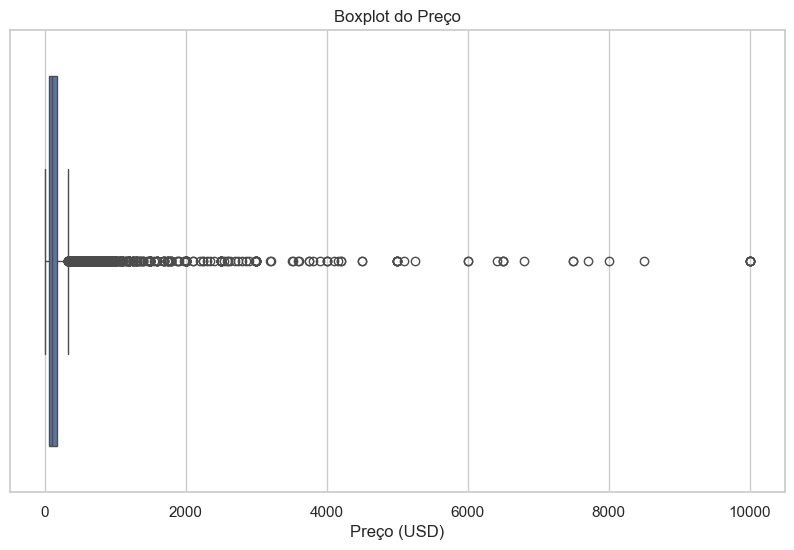

In [4]:
sns.boxplot(x=dados['price'])
plt.title("Boxplot do Preço")
plt.xlabel("Preço (USD)")
plt.show()

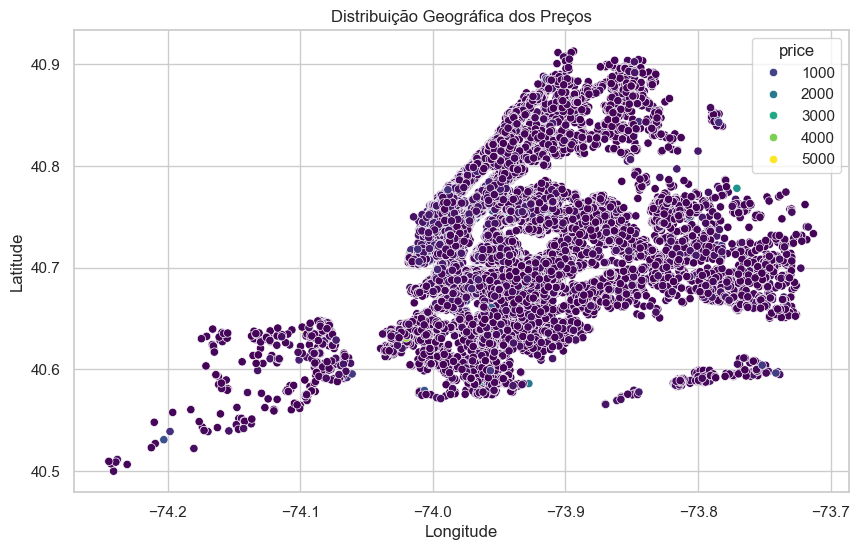

In [6]:
# Relação preço x localização
sns.scatterplot(data=dados, x='longitude', y='latitude', hue='price', palette='viridis')
plt.title("Distribuição Geográfica dos Preços")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [33]:
#identificando as outliers
dados = dados[dados['price'] <= 5000]

q1_preco = dados['price'].quantile(0.25)
q3_preco = dados['price'].quantile(0.75)
iqr_preco = q3_preco - q1_preco

q1_noites = dados['minimo_noites'].quantile(0.25)
q3_noites = dados['minimo_noites'].quantile(0.75)
iqr_noites = q3_noites - q1_noites

limite_inferior_preco = max(0, q1_preco - 1.5 * iqr_preco)
limite_superior_preco = q3_preco + 1.5 * iqr_preco

limite_inferior_noites = max(0, q1_noites - 1.5 * iqr_noites)
limite_superior_noites = q3_noites + 1.5 * iqr_noites

print(f"Preço - Limite Inferior: {limite_inferior_preco}, Limite Superior: {limite_superior_preco}")
print(f"Noites Mínimas - Limite Inferior: {limite_inferior_noites}, Limite Superior: {limite_superior_noites}")


Preço - Limite Inferior: 0, Limite Superior: 334.0
Noites Mínimas - Limite Inferior: 0, Limite Superior: 11.0


Número de valores com preço igual a 0: 0


In [38]:
dados_zero = dados[dados['price'] == 0]
print(dados_zero)


Empty DataFrame
Columns: [id, nome, host_id, host_name, bairro_group, bairro, latitude, longitude, room_type, price, minimo_noites, numero_de_reviews, reviews_por_mes, calculado_host_listings_count, disponibilidade_365]
Index: []


In [29]:
ausentes = dados.isnull().sum()
print(ausentes)

id                               0
nome                             0
host_id                          0
host_name                        0
bairro_group                     0
bairro                           0
latitude                         0
longitude                        0
room_type                        0
price                            0
minimo_noites                    0
numero_de_reviews                0
reviews_por_mes                  0
calculado_host_listings_count    0
disponibilidade_365              0
dtype: int64
